In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Set random seed for reproductibility
np.random.seed(42)

# Generate random data for hours studied (Feature1) and test scores (Target)
n_samples = 500
X1 = np.random.uniform(1, 10, n_samples) # Random hours studied
noise = np.random.normal(0, 5, n_samples) # Random noise
y = 10 * X1 + noise # Linear relationship with noise

# Create a DataFrame for easy manipulation
data = pd.DataFrame({'Hours_Studied': X1, 'Test_Score': y})
data.head()

,Hours_Studied,Test_Score
0,4.370861,45.417391
1,9.556429,104.945142
2,7.587945,80.631574
3,6.387926,60.994745
4,2.404168,19.549604


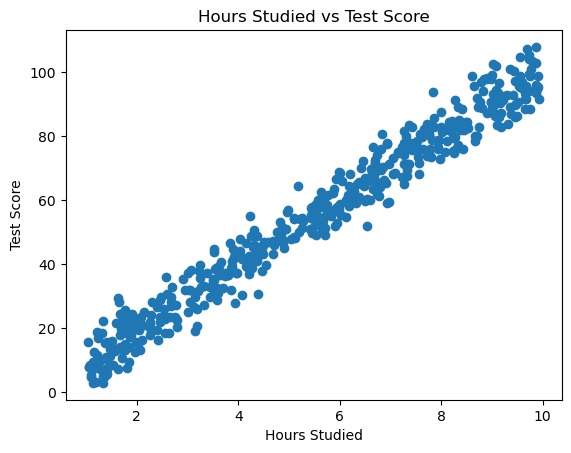

               Hours_Studied  Test_Score
Hours_Studied       1.000000    0.983399
Test_Score          0.983399    1.000000


In [2]:
# Scatter plot to visualize the relationship
plt.scatter(data['Hours_Studied'], data['Test_Score'])
plt.title('Hours Studied vs Test Score')
plt.xlabel('Hours Studied')
plt.ylabel('Test Score')
plt.show()

# Check the correlation between features and target
corr_matrix = data.corr()
print(corr_matrix)

In [3]:
# Split the dataset into independent variables (X) and dependent variable (y)
X = data[['Hours_Studied']]
y = data['Test_Score']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Instantiate the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Check the model's coefficient and intercept
print("Coefficient: ", model.coef_)
print("Intercept: ", model.intercept_)

Coefficient:  [27.31629308]
Intercept:  55.31588683514129


In [5]:
# Example of predicting a single value using a new data point
new_data = np.array([[6]]) # Example value for hours studied
new_data_df = pd.DataFrame(new_data, columns=['Hours_Studied'])

# Scale the new data
new_data_scaled = scaler.transform(new_data_df)

# Predict the test score
single_prediction = model.predict(new_data_scaled)

print(f"Predicted Test Score for 6 hours of study: {single_prediction[0]}")

Predicted Test Score for 6 hours of study: 60.03282292232381


In [6]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 26.105427937987933
R-squared: 0.9645671742510007


In [7]:
# Save the trained model to a file
joblib.dump(model, 'linear_regression_model.pk1')
joblib.dump(scaler, 'scaler.pk1')

['scaler.pk1']

In [10]:
# Load the saved model and scaler
loaded_model = joblib.load('linear_regression_model.pk1')
loaded_scaler = joblib.load('scaler.pk1')

# New data for prediction (e.g. 6 hours of study)
new_data = np.array([[6]])
new_data_df = pd.DataFrame(new_data, columns=['Hours_Studied'])

# Scale the new data using the loaded scaler
new_data_scaled = loaded_scaler.transform(new_data_df)

# Make the prediction using the loaded model
single_prediction = loaded_model.predict(new_data_scaled)

# Output the predicted test score
print(f"Predicted Test Score for 6 hours of study: {single_prediction[0]}")

Predicted Test Score for 6 hours of study: 60.03282292232381
